# Python Capstone Project  
## TOPIC: Amazon Laptop Prices  
###  1. What are the top 10 brands by unit sold?  
###  2. What are the 10 average least expensive brands?
###  3. What are the 10 average most expensive brands?
###  4. What are the 10 average most rated brands? 
###  5. Applying the correlation matrix

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Uploading dataset
Amazon = pd.read_csv("amazon_laptop_prices.csv")

In [4]:
#Checking the first 5 rows
Amazon.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [6]:
#Checking the last 5 rows
Amazon.tail()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
4441,MSI,Stealth GS66 12UGS-025,15.6 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 3070,1.8 GHz,1.0,"$1,699.00"
4442,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
4443,Dell,Inspiron 3511 Laptop,15.6 Inches,Black,512 GB,Core i3,8 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,$591.99
4444,Dell,Latitude 3420 Laptop,14 Inches,NaN,512 GB,Core i5,8 GB,Windows 10 Pro,NaN,Integrated,Intel Integrated Graphics,0.9 GHz,NaN,"$1,771.99"
4445,Dell,Latitude 5430 Laptop,14 Inches,Black,256 GB,Core i5,NaN,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,3.3 GHz,NaN,$938.99


In [7]:
#Exploring the data
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [9]:
Amazon.isnull().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

## Data Cleaning

In [10]:
# Convert screen size to numeric type
Amazon.screen_size

0          14 Inches
1        15.6 Inches
2       15.66 Inches
3        13.3 Inches
4        15.3 Inches
            ...     
4441     15.6 Inches
4442       14 Inches
4443     15.6 Inches
4444       14 Inches
4445       14 Inches
Name: screen_size, Length: 4446, dtype: object

In [11]:
Amazon.screen_size.value_counts()

15.6 Inches     1995
14 Inches       1113
16 Inches        362
15.66 Inches     196
13.3 Inches      194
17.3 Inches      150
17 Inches         89
11.6 Inches       84
13.4 Inches       43
18 Inches         41
13 Inches         36
15 Inches         25
13.5 Inches       11
12.5 Inches       10
14.1 Inches        9
12 Inches          7
10.1 Inches        7
13.1 Inches        6
16.1 Inches        5
14.5 Inches        4
16.2 Inches        4
13.6 Inches        4
15.4 Inches        3
12.3 Inches        3
13.9 Inches        3
11 Inches          2
12.4 Inches        2
12.45 Inches       2
10.5 Inches        1
12.2 Inches        1
14.4 Inches        1
15.3 Inches        1
22 Inches          1
27 Inches          1
10 Inches          1
Name: screen_size, dtype: int64

In [12]:
Amazon.screen_size.replace(" Inches","", inplace=True, regex=True)
Amazon.screen_size

0          14
1        15.6
2       15.66
3        13.3
4        15.3
        ...  
4441     15.6
4442       14
4443     15.6
4444       14
4445       14
Name: screen_size, Length: 4446, dtype: object

In [14]:
Amazon.screen_size = pd.to_numeric(Amazon.screen_size)
Amazon.screen_size

0       14.00
1       15.60
2       15.66
3       13.30
4       15.30
        ...  
4441    15.60
4442    14.00
4443    15.60
4444    14.00
4445    14.00
Name: screen_size, Length: 4446, dtype: float64

In [15]:
Amazon.screen_size.isnull().sum()

29

## Convert harddisk to numeric value

In [16]:
Amazon.harddisk

0       1000 GB
1       1000 GB
2           NaN
3        256 GB
4        256 GB
         ...   
4441        NaN
4442    1000 GB
4443     512 GB
4444     512 GB
4445     256 GB
Name: harddisk, Length: 4446, dtype: object

In [17]:
Amazon.harddisk.value_counts()

1000 GB    1334
512 GB      747
256 GB      476
1 TB        315
64 GB       194
1152 GB     177
2000 GB     165
2 TB        124
128 GB      114
32 GB        48
4000 GB      47
500 GB       34
4 TB         26
8000 GB      18
320 GB        8
16 GB         8
160 GB        4
6000 GB       3
480 GB        2
240 GB        2
8 GB          2
8 TB          2
1024 GB       2
2048 GB       1
1512 GB       1
640 GB        1
512 MB        1
1.5 TB        1
256           1
1.92 TB       1
32 MB         1
1256 GB       1
64 MB         1
250 GB        1
128 MB        1
512           1
300 GB        1
120 GB        1
65 GB         1
64            1
3 TB          1
Name: harddisk, dtype: int64

In [18]:
Amazon.harddisk.replace(" GB","", inplace=True, regex=True)
# har dist is MBs seems to me mistaken, we assume it was also in GBs
Amazon.harddisk.replace(" MB","", inplace=True, regex=True)
Amazon.harddisk.value_counts()

1000       1334
512         749
256         477
1 TB        315
64          196
1152        177
2000        165
2 TB        124
128         115
32           49
4000         47
500          34
4 TB         26
8000         18
16            8
320           8
160           4
6000          3
8 TB          2
8             2
480           2
1024          2
240           2
1.92 TB       1
2048          1
640           1
1.5 TB        1
250           1
1512          1
1256          1
300           1
120           1
65            1
3 TB          1
Name: harddisk, dtype: int64

In [19]:
Amazon.harddisk.replace(" TB","000", inplace=True, regex=True)
Amazon.harddisk.value_counts()

1000       1649
512         749
256         477
2000        289
64          196
1152        177
128         115
4000         73
32           49
500          34
8000         20
320           8
16            8
160           4
6000          3
480           2
240           2
8             2
1024          2
1.92000       1
2048          1
640           1
1.5000        1
120           1
1512          1
1256          1
250           1
65            1
300           1
3000          1
Name: harddisk, dtype: int64

In [20]:
# correct two strings in decimel
Amazon.harddisk.replace("1.92000","1920", inplace=True, regex=True)
Amazon.harddisk.replace("1.5000","1500", inplace=True, regex=True)
Amazon.harddisk.value_counts()

1000    1649
512      749
256      477
2000     289
64       196
1152     177
128      115
4000      73
32        49
500       34
8000      20
320        8
16         8
160        4
6000       3
480        2
240        2
8          2
1024       2
1920       1
2048       1
640        1
1500       1
120        1
1512       1
1256       1
250        1
65         1
300        1
3000       1
Name: harddisk, dtype: int64

In [21]:
# convert to harddisk datatype to float type
Amazon.harddisk = pd.to_numeric(Amazon.harddisk)
Amazon.harddisk

0       1000.0
1       1000.0
2          NaN
3        256.0
4        256.0
         ...  
4441       NaN
4442    1000.0
4443     512.0
4444     512.0
4445     256.0
Name: harddisk, Length: 4446, dtype: float64

## Convert RAM to numeric value

In [22]:
Amazon.ram

0        8 GB
1       64 GB
2       32 GB
3        8 GB
4        8 GB
        ...  
4441    32 GB
4442     8 GB
4443     8 GB
4444     8 GB
4445      NaN
Name: ram, Length: 4446, dtype: object

In [24]:
Amazon.ram.value_counts()

16 GB       1344
32 GB       1092
8 GB         791
64 GB        502
20 GB        331
4 GB         216
12 GB         40
24 GB         21
40 GB         13
48 GB         12
2 GB           9
1 GB           4
128 GB         3
6 GB           3
64 MB          1
5 GB           1
96 GB          1
31.99 GB       1
Name: ram, dtype: int64

In [25]:
Amazon.ram.replace(" GB","", inplace=True, regex=True)
Amazon.ram.replace(" MB","", inplace=True, regex=True) # seems mistake, assume its in GB
Amazon.ram.value_counts()

16       1344
32       1092
8         791
64        503
20        331
4         216
12         40
24         21
40         13
48         12
2           9
1           4
128         3
6           3
96          1
5           1
31.99       1
Name: ram, dtype: int64

In [26]:
# convert to ram dataype to float type
Amazon.ram = pd.to_numeric(Amazon.ram)
Amazon.ram

0        8.0
1       64.0
2       32.0
3        8.0
4        8.0
        ... 
4441    32.0
4442     8.0
4443     8.0
4444     8.0
4445     NaN
Name: ram, Length: 4446, dtype: float64

## Convert cpu speed to numeric value

In [27]:
Amazon.cpu_speed

0       1.2 GHz
1           NaN
2       1.8 GHz
3           NaN
4           NaN
         ...   
4441    1.8 GHz
4442    1.2 GHz
4443        NaN
4444    0.9 GHz
4445    3.3 GHz
Name: cpu_speed, Length: 4446, dtype: object

In [28]:
Amazon.cpu_speed.value_counts()

1.1 GHz         509
1.8 GHz         410
1.2 GHz         312
2.6 GHz          31
2.4 GHz          24
1.7 GHz          17
1 GHz            12
2.8 GHz          12
2.3 GHz          11
5 GHz            11
3.5 GHz          11
3 GHz            10
2 GHz             9
2.2 GHz           8
4.5 GHz           7
3.4 GHz           7
1.6 GHz           7
4.6 GHz           6
2.7 GHz           6
3.7 GHz           6
4.2 GHz           6
2.1 GHz           6
2.5 GHz           6
4.7 GHz           6
1.9 GHz           5
4.8 GHz           5
3.6 GHz           5
2.9 GHz           4
1.3 GHz           4
5.6 GHz           3
3.8 GHz           3
4.4 GHz           3
4 GHz             2
3.2 GHz           2
3.9 GHz           2
3.4               2
2.53 GHz          2
3.3 GHz           2
5.1 GHz           2
4.3 GHz           2
3.3               2
4.1 GHz           2
5.2 GHz           1
2 Hz              1
3.1 GHz           1
1.9               1
2.5, 3.1 GHz      1
3200 Hz           1
2.2, 3.9 GHz      1
2133 MHz          1


In [29]:
Amazon.cpu_speed.replace(" GHz","", inplace=True, regex=True)
Amazon.cpu_speed.replace("2133 MHz","2.1", inplace=True, regex=True)
Amazon.cpu_speed.replace("3200 Hz","3.2", inplace=True, regex=True)
Amazon.cpu_speed.replace(" Hz","", inplace=True, regex=True) # 2Hz seems mistake, assume its in GHz
Amazon.cpu_speed.value_counts()

1.1         509
1.8         411
1.2         312
2.6          32
2.4          25
1.7          17
1            12
2.8          12
5            11
2.3          11
3.5          11
3            10
2            10
3.4           9
2.2           8
4.7           7
2.1           7
1.6           7
4.5           7
1.9           6
4.6           6
3.7           6
2.7           6
4.2           6
2.5           6
4.8           5
3.6           5
2.9           4
1.3           4
3.3           4
4.4           3
3.8           3
3.2           3
5.6           3
5.1           2
4             2
2.53          2
4.1           2
4.3           2
3.9           2
3.49          1
1.5           1
2.66          1
1.4           1
5.2           1
9120          1
2.2, 3.9      1
2.5, 3.1      1
3.1           1
0.9           1
Name: cpu_speed, dtype: int64

In [30]:
Amazon.cpu_speed.replace("9120","9.1", inplace=True, regex=True) # seems mistake
Amazon.cpu_speed.replace("2.2, 3.9","3.1", inplace=True, regex=True) # Average
Amazon.cpu_speed.replace("2.5, 3.1","2.8", inplace=True, regex=True) # Average
Amazon.cpu_speed.value_counts()

1.1     509
1.8     411
1.2     312
2.6      32
2.4      25
1.7      17
2.8      13
1        12
3.5      11
2.3      11
5        11
2        10
3        10
3.4       9
2.2       8
4.7       7
1.6       7
2.1       7
4.5       7
1.9       6
4.2       6
4.6       6
2.7       6
2.5       6
3.7       6
3.6       5
4.8       5
1.3       4
3.3       4
2.9       4
5.6       3
3.2       3
4.4       3
3.8       3
2.53      2
4         2
4.1       2
4.3       2
3.1       2
5.1       2
3.9       2
9.1       1
2.66      1
1.4       1
1.5       1
3.49      1
5.2       1
0.9       1
Name: cpu_speed, dtype: int64

In [32]:
# convert to float type
Amazon.cpu_speed = pd.to_numeric(Amazon.cpu_speed)
Amazon.cpu_speed

0       1.2
1       NaN
2       1.8
3       NaN
4       NaN
       ... 
4441    1.8
4442    1.2
4443    NaN
4444    0.9
4445    3.3
Name: cpu_speed, Length: 4446, dtype: float64

## Convert Price to numeric value

In [33]:
print(Amazon.price)
print ('Null values of price are: ', Amazon.price.isnull().sum())

0         $589.99 
1         $999.99 
2       $1,599.00 
3         $689.99 
4       $1,144.48 
           ...    
4441    $1,699.00 
4442      $589.99 
4443      $591.99 
4444    $1,771.99 
4445      $938.99 
Name: price, Length: 4446, dtype: object
Null values of price are:  5


In [34]:
Amazon.price.value_counts()

$389.99       315
$589.99       310
$999.99       252
$1,599.00     210
$1,699.00     204
             ... 
$2,629.98       1
$1,659.67       1
$245.01         1
$2,951.99       1
$938.99         1
Name: price, Length: 1858, dtype: int64

In [5]:
Amazon.price = Amazon.price.str.replace('$', '')
Amazon.price = Amazon.price.str.replace(',', '')
Amazon.price.value_counts()

389.99      315
589.99      310
999.99      252
1599.00     210
1699.00     204
           ... 
2629.98       1
1659.67       1
245.01        1
2951.99       1
938.99        1
Name: price, Length: 1858, dtype: int64

In [37]:
Amazon.price = pd.to_numeric(Amazon.price)
Amazon.price

0        589.99
1        999.99
2       1599.00
3        689.99
4       1144.48
         ...   
4441    1699.00
4442     589.99
4443     591.99
4444    1771.99
4445     938.99
Name: price, Length: 4446, dtype: float64

In [38]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   float64
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   float64
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   float64
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   float64
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   float64
dtypes: float64(6), object(8)
memory usage: 486.4+ KB


In [39]:
print('Total unique Brands: ', len(Amazon.brand.value_counts()))
Amazon.brand.value_counts()

Total unique Brands:  50


Dell                             1581
HP                                804
ROKC                              637
MSI                               473
Lenovo                            308
ASUS                              160
DELL                              147
acer                              108
LG                                 39
Apple                              29
SAMSUNG                            23
Microsoft                          15
Alienware                          14
Panasonic                          12
Acer                               11
Gigabyte                           11
Toughbook                          11
hp                                  6
Razer                               6
LENOVO                              6
lenovo                              4
Latitude                            3
Luqeeg                              3
SHOXLAB                             2
CTL                                 2
Computer Upgrade King               2
dell        

## There are some inconsistencies in brand names, some names are repeating with uppercase and lowercase charachers

In [40]:
brands = Amazon.brand.unique()
brands.sort()
brands

array(['ASUS', 'AWOW', 'Acer', 'Alienware', 'Apple', 'Asus',
       'Best Notebooks', 'CTL', 'Carlisle FoodService Products',
       'Computer Upgrade King', 'Corsair', 'DELL', 'Dell', 'Elo',
       'Gateway', 'Gigabyte', 'GizPro', 'Goldengulf', 'HP', 'IVIEW',
       'JTD', 'LENOVO', 'LG', 'LPT', 'Latitude', 'Lenovo', 'Luqeeg',
       'MAINGEAR', 'MICROTELLA', 'MSI', 'Microsoft', 'Mytrix', 'ONN',
       'Panasonic', 'Quality Refurbished Computers', 'ROKC', 'Razer',
       'SAMSUNG', 'SHOXLAB', 'TOPOSH', 'Tocosy', 'Toughbook', 'VAIO',
       'XAMMUE', 'XPG', 'acer', 'asus', 'dell', 'hp', 'lenovo'],
      dtype=object)

## I can see repetition of ASUS, DELL, ACER, DELL, HP, LENOVO etc.

In [41]:
# convert to lower case
Amazon.brand = Amazon.brand.str.lower()
# remove trailing white spaces
Amazon.brand = Amazon.brand.str.strip()

brands2 = Amazon.brand.unique()
brands2.sort()
brands2


array(['acer', 'alienware', 'apple', 'asus', 'awow', 'best notebooks',
       'carlisle foodservice products', 'computer upgrade king',
       'corsair', 'ctl', 'dell', 'elo', 'gateway', 'gigabyte', 'gizpro',
       'goldengulf', 'hp', 'iview', 'jtd', 'latitude', 'lenovo', 'lg',
       'lpt', 'luqeeg', 'maingear', 'microsoft', 'microtella', 'msi',
       'mytrix', 'onn', 'panasonic', 'quality refurbished computers',
       'razer', 'rokc', 'samsung', 'shoxlab', 'tocosy', 'toposh',
       'toughbook', 'vaio', 'xammue', 'xpg'], dtype=object)

In [42]:
print('Now total unique Brands: ', len(Amazon.brand.value_counts()))
Amazon.brand.value_counts().head(10)

Now total unique Brands:  42


dell       1730
hp          810
rokc        637
msi         473
lenovo      318
asus        163
acer        119
lg           39
apple        29
samsung      23
Name: brand, dtype: int64

## Statistical Analysis

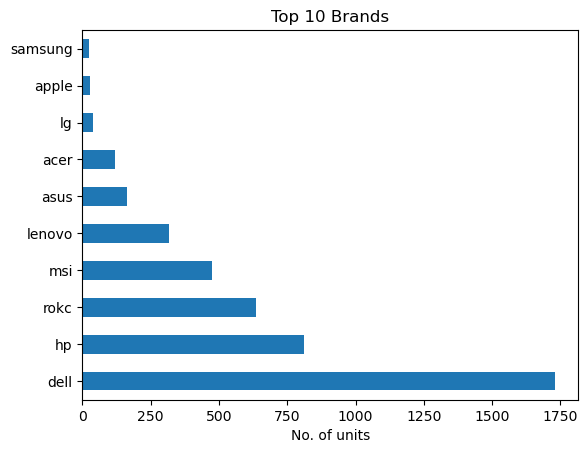

In [43]:
# Top 10 brands by unit sold
Amazon.brand.value_counts().head(10).plot.barh();
plt.title('Top 10 Brands')
plt.xlabel('No. of units')
plt.show()

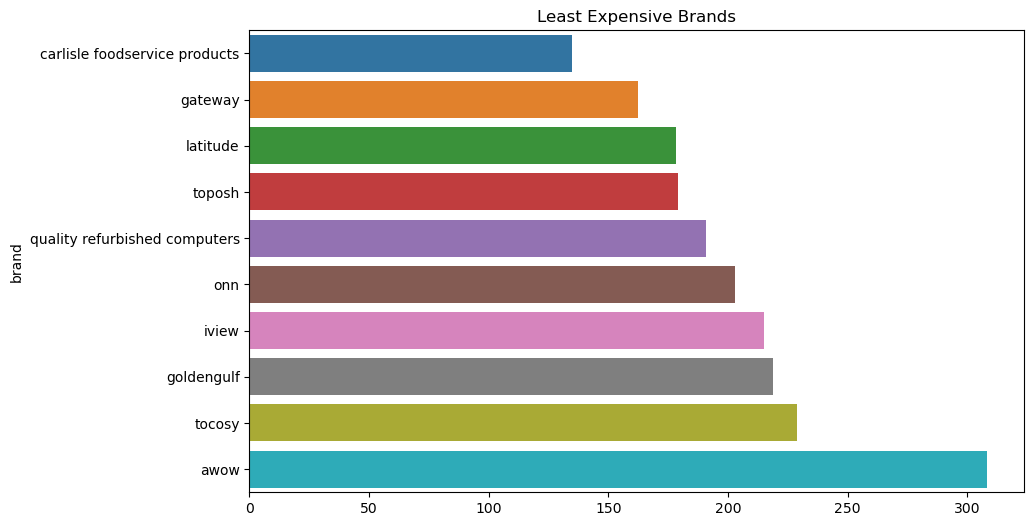

In [44]:
# 10 average least expensive brands
temp = Amazon.groupby('brand').price.mean()
temp2 = temp.sort_values(ascending=True)[:10]
plt.figure(figsize=(10,6))
plt.title('Least Expensive Brands')
sns.barplot(y=temp2.index,x=temp2.values);

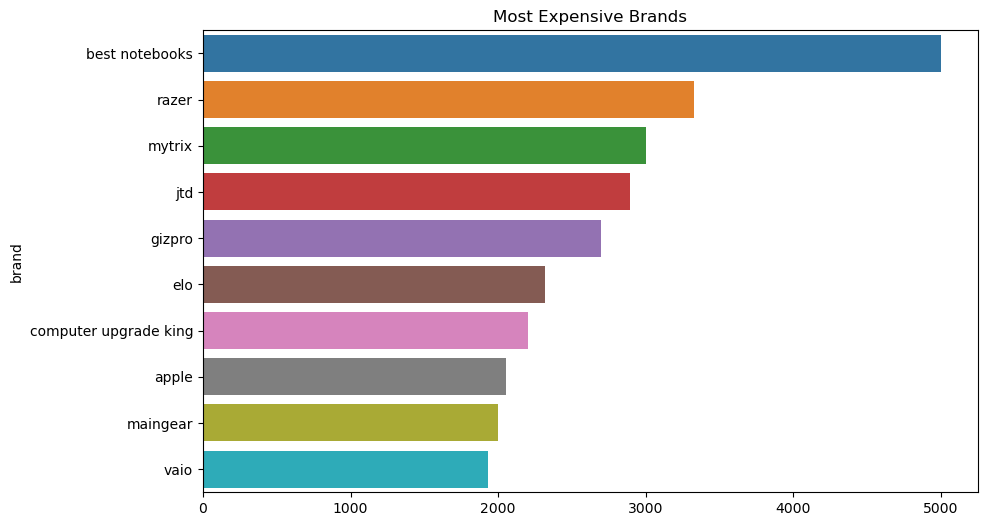

In [45]:
# 10 average most expensive brands
temp = Amazon.groupby('brand').price.mean()
temp2 = temp.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.title('Most Expensive Brands')
sns.barplot(y=temp2.index,x=temp2.values);

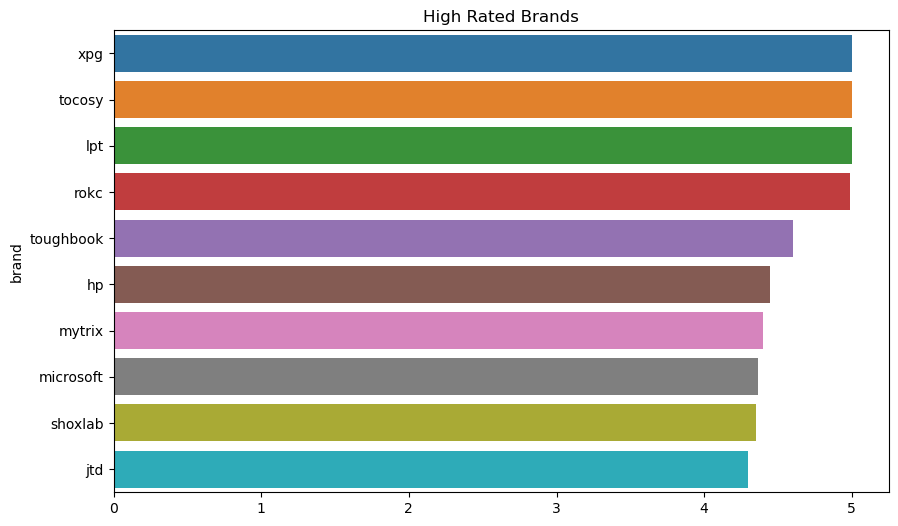

In [46]:
# 10 average most rated brands
temp = Amazon.groupby('brand').rating.mean()
temp2 = temp.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.title('High Rated Brands')
sns.barplot(y=temp2.index,x=temp2.values);

## Corelation Matrix

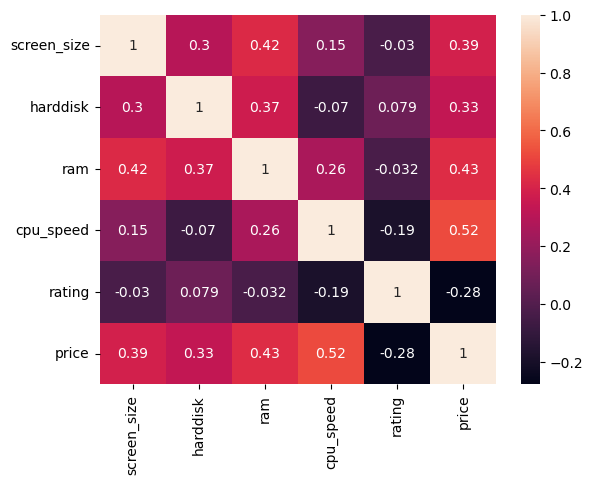

In [47]:
plt.figure()
sns.heatmap(Amazon.select_dtypes(exclude=object).corr(),annot=True);

## Save Cleaned Data

In [48]:
Amazon.to_csv("Cleaned_amazon_laptop_prices.csv", index = False)